In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


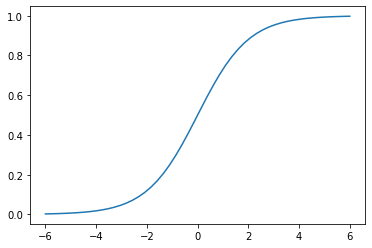

In [13]:
def logistic(x):
    return np.exp(x)/(1+np.exp(x))
x = np.linspace(-6,6,50,dtype=float)
y = logistic(x)
plt.plot(x,y)

In [15]:
os.chdir("D:/CDAC/Machine Learning")

In [17]:
df = pd.read_csv('day6.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

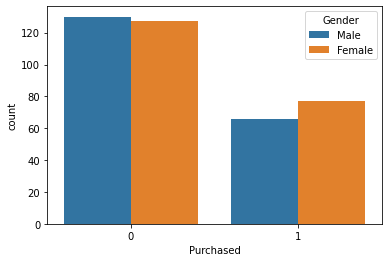

In [25]:
sns.countplot(x=df['Purchased'],hue=df['Gender'])

## Male have not purchased the item and female have purchased the item as compared to male

<AxesSubplot:xlabel='Age', ylabel='Density'>

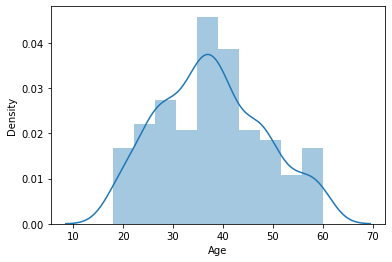

In [28]:
sns.distplot(df['Age'])

There are more number of people data having age between 35-40

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

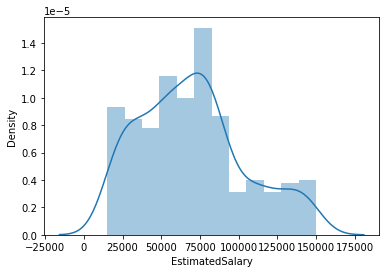

In [29]:
sns.distplot(df['EstimatedSalary'])

more number of people are having estimated salary of 75k - 80k

In [21]:
x = df.iloc[:,-3:-1]
y = df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [34]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
confusion_matrix(y_test, prediction)

array([[75,  4],
       [ 9, 32]], dtype=int64)

In [42]:
print(accuracy_score(y_test,prediction))

0.8916666666666667


In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120

